# Objective :

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# Step 1 :  Import Library and Dataset

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Read the data in
shill = pd.read_csv(r"C:\Users\sneha\Downloads\Shill Bidding Dataset.csv")
shill

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [8]:
shill.head(5)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [9]:
shill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [10]:
shill.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


### Removing Irrelavent Variable

In [11]:
shill= shill.drop(['Bidder_ID'],axis=1)
shill.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio',
       'Auction_Duration', 'Class'],
      dtype='object')

### Checking Missing Value

In [12]:
# Do we have NA's in data
shill.isna().sum()

Record_ID                 0
Auction_ID                0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

<AxesSubplot:>

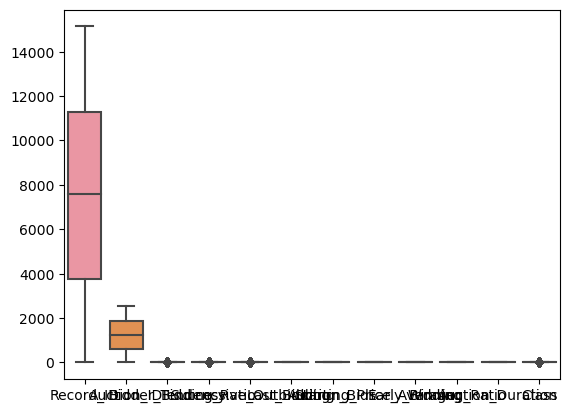

In [13]:
import seaborn as sns
sns.boxplot(data = shill)

In [14]:
Q1 = shill['Bidder_Tendency'].quantile(0.25)
Q3 = shill['Bidder_Tendency'].quantile(0.75)

IQR = Q3- Q1
upper_limit= Q3 + 1.5*IQR
upper_limit

0.376126127

In [15]:
shill['Bidder_Tendency']=np.where(shill['Bidder_Tendency']> upper_limit,upper_limit,shill['Bidder_Tendency'])

In [16]:
Q1 = shill['Bidding_Ratio'].quantile(0.25)
Q3 = shill['Bidding_Ratio'].quantile(0.75)

IQR = Q3- Q1
upper_limit= Q3 + 1.5*IQR
upper_limit

0.351449276

In [17]:
shill['Bidding_Ratio']=np.where(shill['Bidding_Ratio']> upper_limit,upper_limit,shill['Bidding_Ratio'])

In [18]:
Q1 = shill['Successive_Outbidding'].quantile(0.25)
Q3 = shill['Successive_Outbidding'].quantile(0.75)

IQR = Q3- Q1
upper_limit= Q3 + 1.5*IQR
upper_limit

0.0

In [19]:
shill['Successive_Outbidding']=np.where(shill['Successive_Outbidding']> upper_limit,upper_limit,shill['Successive_Outbidding'])

<AxesSubplot:>

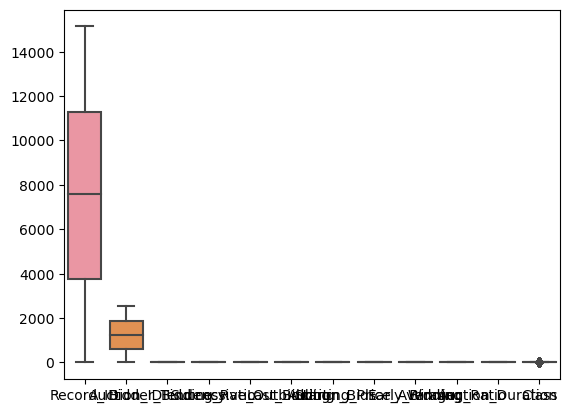

In [20]:
import seaborn as sns
sns.boxplot(data = shill)

In [21]:
shill.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,0.200000,0.351449,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [23]:
shill.Class.value_counts(ascending=False)

0    5646
1     675
Name: Class, dtype: int64

# Churn Rate Analysis

In [26]:
import plotly.express as px

fig = px.pie(shill,names='Class',color='Class',
             color_discrete_map={'0':'red',
                                 '1':'green'})
fig.show()

# Step 3: Data Partition

In [31]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = shill.drop(['Class'],axis=1)
y = shill[['Class']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=123)

# Step 4: Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [33]:
output.intercept_  # beto 

array([-5.2275842])

In [34]:
output.coef_  # Beta 1 -- 

array([[-6.24242027e-05, -4.01789682e-04,  1.56144464e+00,
         1.93674342e+00,  0.00000000e+00,  7.84298694e-01,
         1.29477880e+00,  9.34491679e-01,  1.93905287e-01,
         4.42266033e+00, -8.80365364e-02]])

In [35]:
output.feature_names_in_

array(['Record_ID', 'Auction_ID', 'Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio',
       'Auction_Duration'], dtype=object)

In [36]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
4778,11355,580,0.200000,0.020833,0.0,0.997762,0.625000,0.993593,0.997762,0.000000,5,0
6092,14567,1355,0.076923,0.111111,0.0,0.112877,0.500000,0.999935,0.112877,0.760000,7,1
3919,9337,2450,0.142857,0.125000,0.0,0.013113,0.000000,0.993593,0.012755,0.857143,1,0
5697,13624,267,0.045455,0.031250,0.0,0.613241,0.437500,0.000000,0.613241,0.000000,3,0
5860,14029,1064,0.011628,0.038462,0.0,0.425556,0.307692,0.000000,0.425556,0.000000,1,0


# Step 6 : Predictions on Train Dataset

In [37]:
train['Probability']= output.predict_proba(X_train)[:,1]  # MODEL = dt
train.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class,Probability
4778,11355,580,0.200000,0.020833,0.0,0.997762,0.625000,0.993593,0.997762,0.000000,5,0,0.028107
6092,14567,1355,0.076923,0.111111,0.0,0.112877,0.500000,0.999935,0.112877,0.760000,7,1,0.129112
3919,9337,2450,0.142857,0.125000,0.0,0.013113,0.000000,0.993593,0.012755,0.857143,1,0,0.156357
5697,13624,267,0.045455,0.031250,0.0,0.613241,0.437500,0.000000,0.613241,0.000000,3,0,0.005757
5860,14029,1064,0.011628,0.038462,0.0,0.425556,0.307692,0.000000,0.425556,0.000000,1,0,0.003297


In [38]:
train['Prediction']=output.predict(X_train)  # MODEL = dt
train.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class,Probability,Prediction
4778,11355,580,0.200000,0.020833,0.0,0.997762,0.625000,0.993593,0.997762,0.000000,5,0,0.028107,0
6092,14567,1355,0.076923,0.111111,0.0,0.112877,0.500000,0.999935,0.112877,0.760000,7,1,0.129112,0
3919,9337,2450,0.142857,0.125000,0.0,0.013113,0.000000,0.993593,0.012755,0.857143,1,0,0.156357,0
5697,13624,267,0.045455,0.031250,0.0,0.613241,0.437500,0.000000,0.613241,0.000000,3,0,0.005757,0
5860,14029,1064,0.011628,0.038462,0.0,0.425556,0.307692,0.000000,0.425556,0.000000,1,0,0.003297,0


# Step 7 : Model Performance Metrics

In [39]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Prediction'],train['Class'])
print(matrix)

[[3815  309]
 [ 129  171]]


#### Final accuracy of Model Before Pruning 

In [41]:
Accuracy_Train=((3915+171)/(4424)*100)
print(Accuracy_Train)   # overfit or High accuracy

92.35985533453888


In [40]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'], train['Prediction']))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3944
           1       0.57      0.36      0.44       480

    accuracy                           0.90      4424
   macro avg       0.75      0.66      0.69      4424
weighted avg       0.89      0.90      0.89      4424



In [42]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
logit_roc_auc

0.6617710446247465

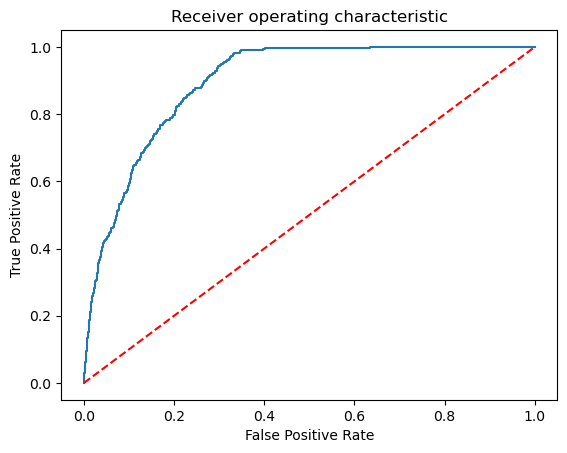

In [43]:
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Step 8 : Predictions on Test Dataset

In [49]:
test=pd.concat([X_test,y_test],axis=1)
test

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
2540,6053,595,0.018519,0.058824,0.0,0.651546,0.000000,0.000000,0.651546,0.000000,5,0
2614,6206,1405,0.376126,0.107143,0.0,0.872188,0.357143,0.993593,0.872188,1.000000,1,0
4592,10902,699,0.016667,0.200000,0.0,0.222569,0.000000,0.000000,0.222569,0.842105,1,0
209,503,1541,0.024390,0.062500,0.0,0.570488,0.000000,0.000000,0.570488,0.000000,5,0
995,2322,1847,0.022727,0.030303,0.0,0.985040,0.454545,0.000000,0.985040,0.000000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3288,7881,341,0.043478,0.086957,0.0,0.571127,0.217391,0.000000,0.571127,0.000000,5,0
4677,11132,2047,0.038462,0.030303,0.0,0.970094,0.454545,0.993593,0.970094,0.000000,7,0
5814,13929,601,0.333333,0.125000,0.0,0.050414,0.000000,0.993593,0.050414,1.000000,5,0
2017,4813,2412,0.100000,0.083333,0.0,0.093403,0.000000,0.000000,0.093403,0.000000,1,0


In [52]:
test['Predicted']=output.predict(X_test)
test.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class,Predicted
2540,6053,595,0.018519,0.058824,0.0,0.651546,0.000000,0.000000,0.651546,0.000000,5,0,0
2614,6206,1405,0.376126,0.107143,0.0,0.872188,0.357143,0.993593,0.872188,1.000000,1,0,1
4592,10902,699,0.016667,0.200000,0.0,0.222569,0.000000,0.000000,0.222569,0.842105,1,0,0
209,503,1541,0.024390,0.062500,0.0,0.570488,0.000000,0.000000,0.570488,0.000000,5,0,0
995,2322,1847,0.022727,0.030303,0.0,0.985040,0.454545,0.000000,0.985040,0.000000,7,0,0


# Step 9 : Model Performance Metrics on Test data 

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Class'])
print(confusion_matrix)

[[1655  118]
 [  47   77]]


In [54]:
Accuracy_test=((1655+77)/(1897)*100)
Accuracy_test

91.30205587770163

# Sensitivity & Specificity

In [55]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1702
           1       0.62      0.39      0.48       195

    accuracy                           0.91      1897
   macro avg       0.78      0.68      0.72      1897
weighted avg       0.90      0.91      0.90      1897



* 93%is accuracy of bad customer capture by model 
* 62% is accuracy of Good customer capture by model 